In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [18]:
iris = datasets.load_iris()
X = iris.data[:,[1,3]]
y = iris.target
#print(X[0:10,:], X[139:-1,:])
#print(y[0:10], y[-11:-1])
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)
#print(X.shape, X_train.shape, X_test.shape)
#print(y.shape, y_train.shape, y_test.shape)
print(np.bincount(y), np.bincount(y_train), np.bincount(y_test))

Class labels: [0 1 2]
[50 50 50] [35 35 35] [15 15 15]


In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#print(X_train[0:10,:])
#print(X_train_std[0:10,:])
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

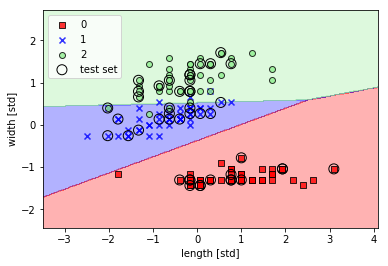

In [5]:
lr = LogisticRegression (C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, 
                      test_idx=range(105,150))
plt.xlabel('length [std]')
plt.ylabel('width [std]')
plt.legend(loc='upper left')
plt.show()

In [11]:
lr.predict_proba(X_test_std[:5, :])

array([[  2.54721988e-07,   8.58649201e-02,   9.14134825e-01],
       [  9.74984162e-01,   2.50158363e-02,   1.87151625e-09],
       [  8.86891393e-01,   1.13108603e-01,   3.43481317e-09],
       [  3.45467329e-06,   4.32039250e-01,   5.67957296e-01],
       [  3.55739168e-03,   8.99676750e-01,   9.67658585e-02]])

In [12]:
lr.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 2, 1], dtype=int64)

In [13]:
lr.predict(X_test_std[:5, :])

array([2, 0, 0, 2, 1])

In [16]:
score = lr.score(X_test_std, y_test)
print(score)

1.0
